# YoloV5 with PyTorch demo

**YOLO - an acronym for 'You only look once'** - is an **object detection algorithm** that divides images into a grid system. Each cell in the grid is responsible for detecting objects within itself.

YOLO is one of the most famous object detection algorithms due to its speed and accuracy.**YOLOv5** has multiple varieties of pre-trained models as we can see below. <br>

The difference between them is the trade-off between **the size of the model**, **inference time** and **precision**. The lightweight model version **YOLOv5n6 is just a few MB** with **1.9M parameters** but not very accurate (mAP = 34). On the other side of the spectrum, we have **YOLOv5x6 whose size is much bigger** but is the most accurate version of its family (**140.7M parameters mAP > 54**).

https://github.com/ultralytics/yolov5/releases

<img src="img/yolo5chart.png" width=800>

<img src="img/yolo5.jpg">

## 1. Settings

In [1]:
#!pip install --upgrade torchvision
#!pip install --upgrade pillow
#!pip install --upgrade matplotlib

In [2]:
import cv2
import datetime
import pandas as pd
import matplotlib.pyplot as plt 
import os
import os.path
from os import path
import sys
import torch

In [3]:
print(torch.__version__)

1.10.1+cu102


In [4]:
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [5]:
cv2.__version__

'4.5.4-dev'

In [6]:
def createdir(dirname):
    if path.os.path.isdir(dirname) :
        print("Directory:", dirname, "exists")
    else:
        print("Creating directory:", dirname)
        os.mkdir(dirname)
        print("Done")

In [7]:
RESULTS_DIR = 'results'
createdir(RESULTS_DIR)

Creating directory: results
Done


In [8]:
YOLODIR = 'yolo'
createdir(YOLODIR)

Creating directory: yolo
Done


In [9]:
!nvidia-smi

Thu Feb  3 13:37:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000001:00:00.0 Off |                    0 |
| N/A   42C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K80           On   | 00000002:00:00.0 Off |                    0 |
| N/A   

In [10]:
def datetimeformat(ts):
    return datetime.datetime.fromtimestamp(ts)

In [11]:
def dirfiles(DIRNAME):
    for item in os.scandir(DIRNAME):
         print(datetimeformat(item.stat().st_atime), item.stat().st_size, item.name)

## 2. Download Yolo pretrained model

In [12]:
yolomodelversion = 'yolov5l6'

#or
#yolomodelversion = 'yolov5n6'
#yolomodelversion = 'yolov5s6'
#yolomodelversion = 'yolov5m6'
#yolomodelversion = 'yolov5x6' or ...

In [13]:
os.chdir(YOLODIR)
model = torch.hub.load('ultralytics/yolov5', 
                       yolomodelversion, 
                       pretrained=True)
os.chdir('..')

Using cache found in /home/azureuser/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-2-1 torch 1.10.1+cu102 CUDA:0 (Tesla K80, 11441MiB)



  0%|          | 0.00/147M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 476 layers, 76726332 parameters, 0 gradients
Adding AutoShape... 


In [14]:
dirfiles(YOLODIR)

2022-02-03 13:37:21.098256 154206589 yolov5l6.pt


## 3. Image testing

In [15]:
for item in os.scandir("images"):
     print(datetimeformat(item.stat().st_atime), '\t', item.stat().st_size, '\t', item.name)

2022-02-02 12:53:35.324728 	 0 	 .ipynb_checkpoints
2022-02-03 09:51:37.641468 	 376113 	 image1.jpg
2022-02-03 09:51:31.437018 	 303976 	 image2.jpg
2022-02-03 09:51:27.963006 	 442514 	 image3.jpg
2022-02-03 09:51:36.398179 	 250326 	 image4.jpg
2022-02-02 15:51:48.190284 	 0 	 test


In [16]:
image = 'images/test/test1.jpg'

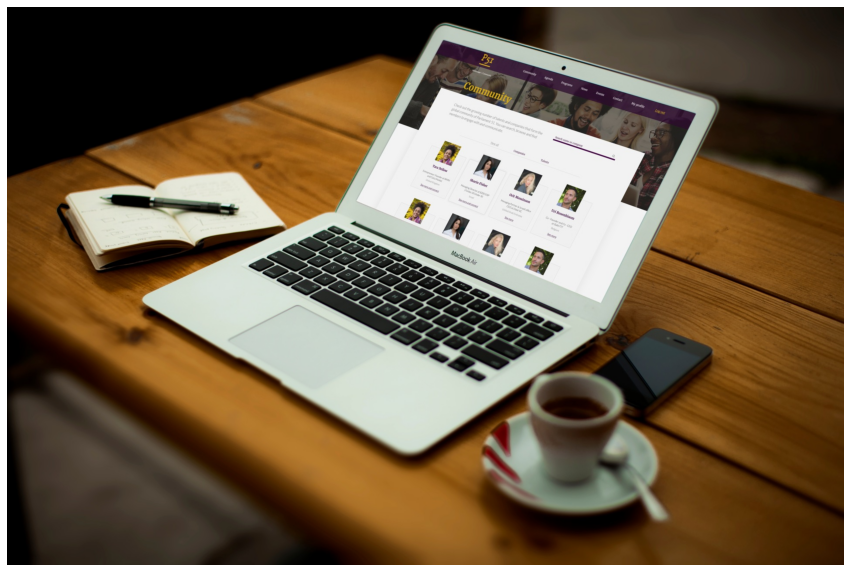

In [17]:
%matplotlib inline
img = cv2.imread(image)
plt.figure(figsize=(15,15)) 
plt.axis('off')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [18]:
print(img.shape)
print(type(img.shape))

(1280, 1920, 3)
<class 'tuple'>


In [19]:
model.conf = 0.5  # confidence threshold (0-1)
model.iou = 0.45 # NMS IoU threshold (0-1)

In [20]:
yoloresults = model(image)
yoloresults.print()

image 1/1: 1280x1920 1 cup, 1 spoon, 1 laptop, 1 cell phone, 1 book
Speed: 183.0ms pre-process, 145.2ms inference, 190.6ms NMS per image at shape (1, 3, 448, 640)


Saved 1 image to results


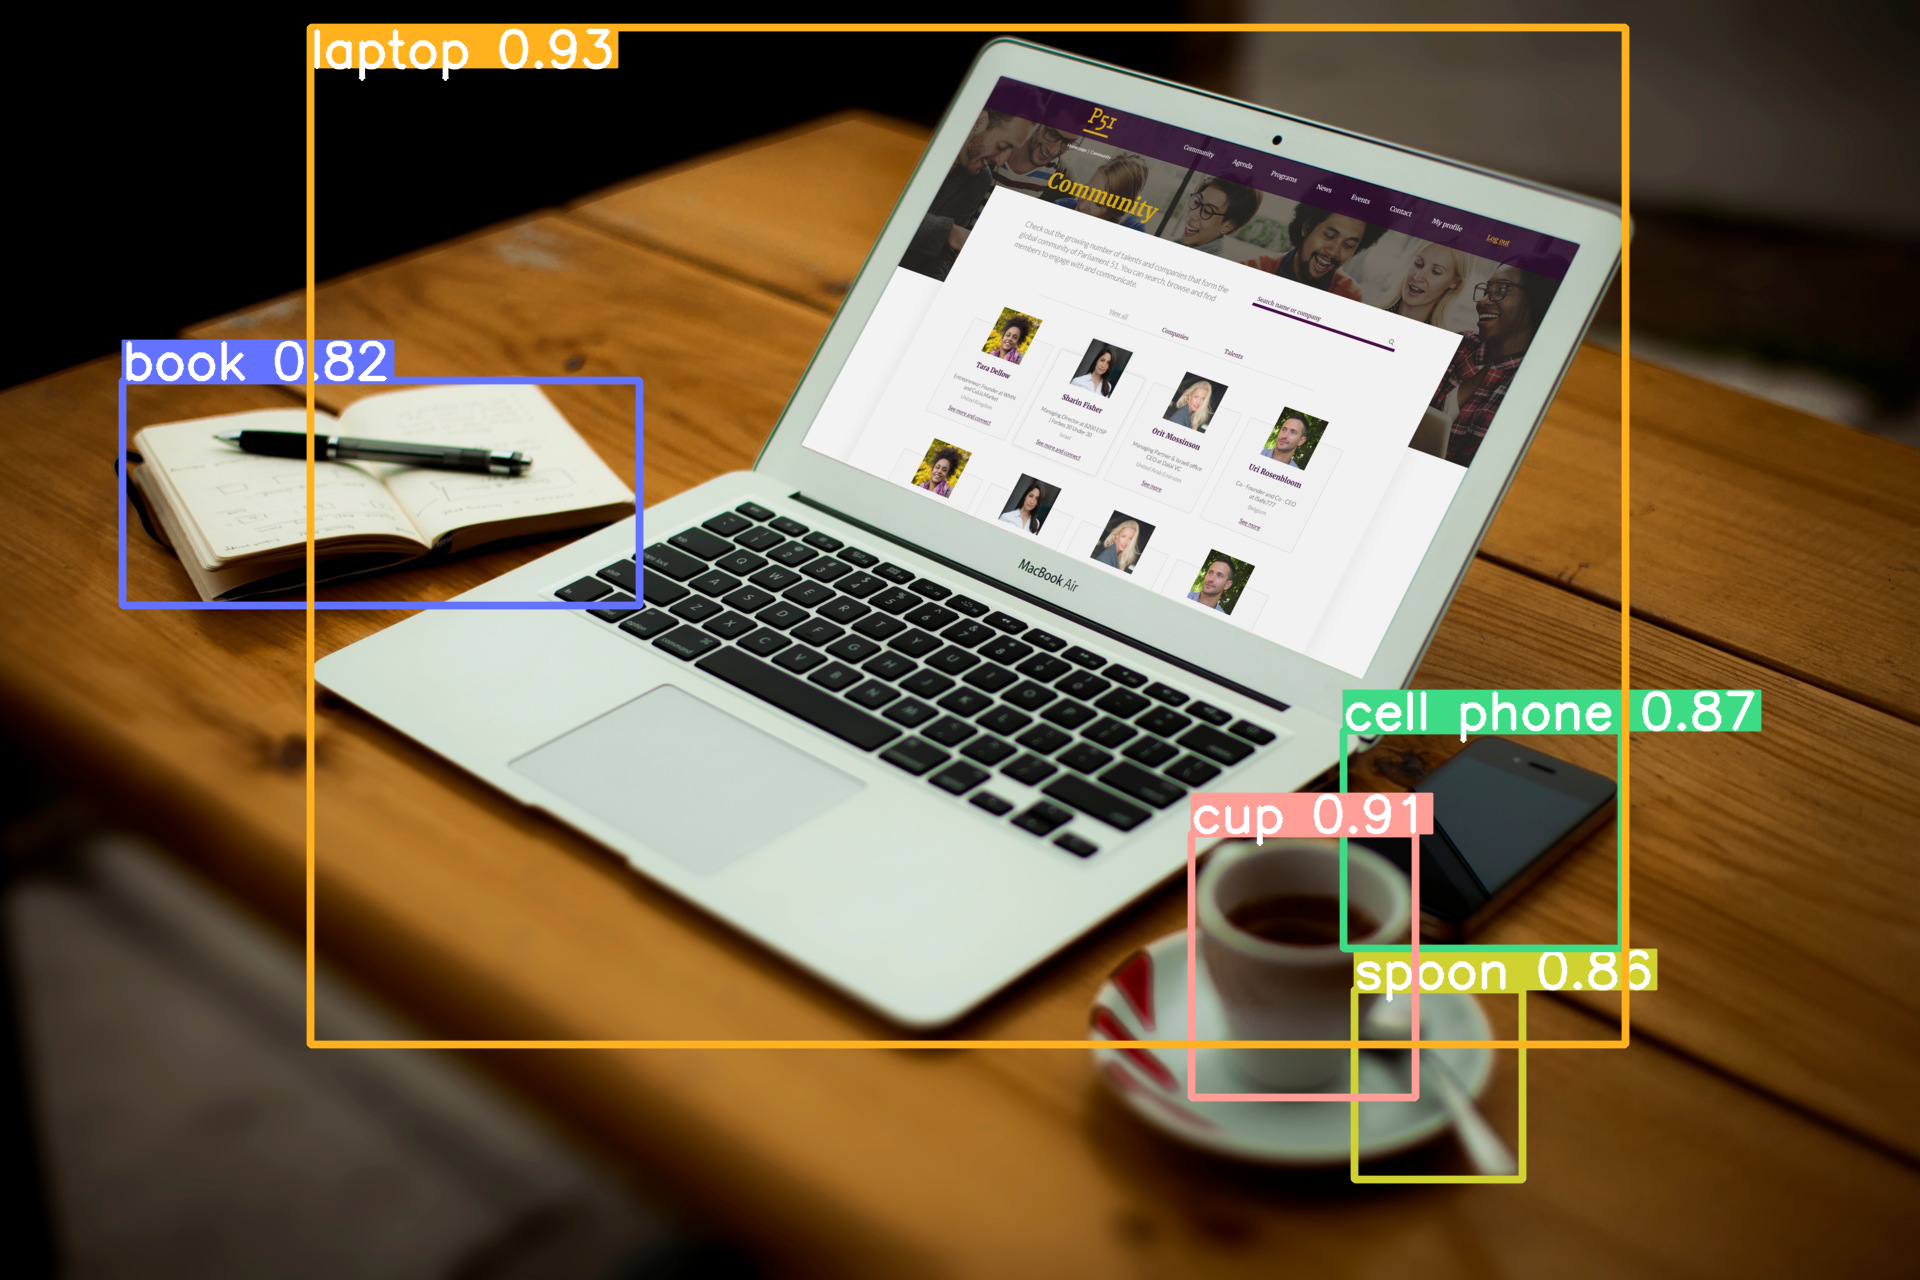

In [21]:
yoloresults.save(RESULTS_DIR)
yoloresults.show()

## 4. Image Testing with options

List of classes that Yolo can detect: https://github.com/vardanagarwal/Proctoring-AI/blob/master/models/classes.TXT

In [22]:
image = 'images/image2.jpg'

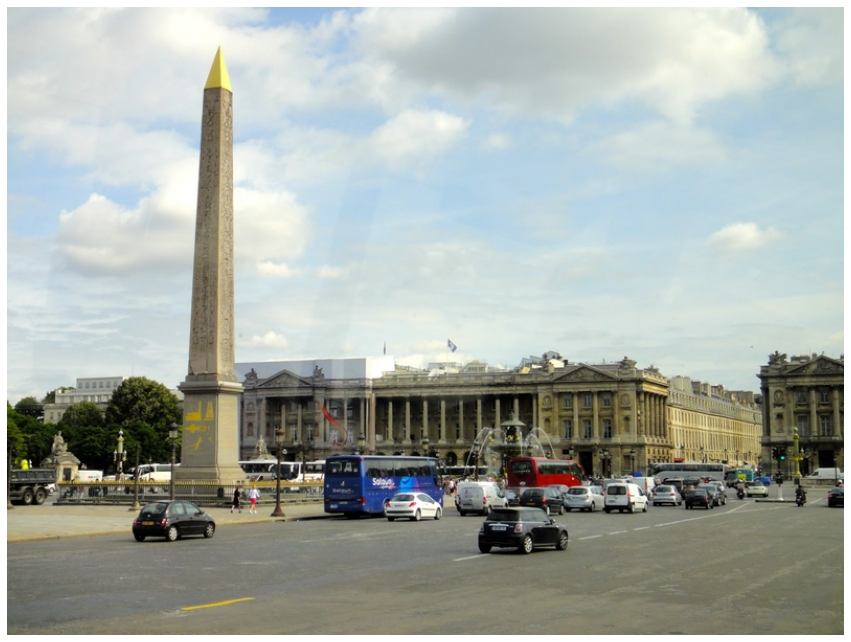

In [23]:
%matplotlib inline
img = cv2.imread(image)
plt.figure(figsize=(15,15)) 
plt.axis('off')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [24]:
model.conf = 0.5  # confidence threshold (0-1)
model.iou = 0.45 # NMS IoU threshold (0-1)
model.classes = [0, 2, 5] # Persons & cars & buses only !!!

# Classes list: https://github.com/vardanagarwal/Proctoring-AI/blob/master/models/classes.TXT

yoloresults = model(image)
yoloresults.print()

image 1/1: 600x800 3 persons, 9 cars, 2 buss
Speed: 61.2ms pre-process, 130.8ms inference, 2.9ms NMS per image at shape (1, 3, 512, 640)


Saved 1 image to results


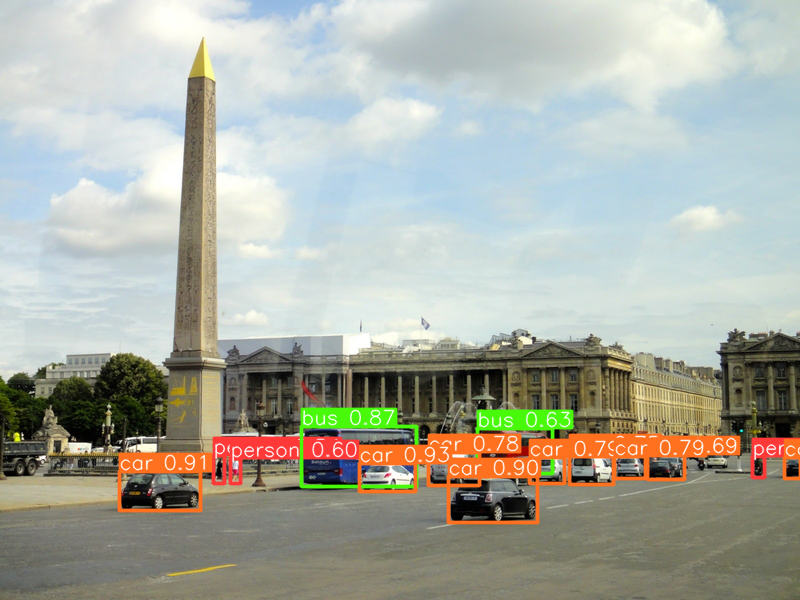

In [25]:
yoloresults.save(RESULTS_DIR)
yoloresults.show()

In [26]:
print("Objects detected:\n")
yoloarray = yoloresults.xyxy[0].cpu().detach().numpy()

i = 1
while i <= len(yoloarray):
    confidence = yoloarray[i-1][4]
    tag = yoloarray[i-1][5]
    if tag == 0:
        tagname = 'Person'
    if tag == 2:
        tagname = 'Car'
    if tag == 5:
        tagname = 'Bus'
    
    print(i, "\tTag:", tagname, "\tConfidence =", round(confidence, 4))
    i +=1

Objects detected:

1 	Tag: Car 	Confidence = 0.9268
2 	Tag: Car 	Confidence = 0.9127
3 	Tag: Car 	Confidence = 0.9035
4 	Tag: Bus 	Confidence = 0.8675
5 	Tag: Car 	Confidence = 0.7875
6 	Tag: Car 	Confidence = 0.7874
7 	Tag: Car 	Confidence = 0.7779
8 	Tag: Car 	Confidence = 0.7541
9 	Tag: Car 	Confidence = 0.6893
10 	Tag: Bus 	Confidence = 0.6273
11 	Tag: Car 	Confidence = 0.5965
12 	Tag: Person 	Confidence = 0.5956
13 	Tag: Person 	Confidence = 0.554
14 	Tag: Person 	Confidence = 0.5405


In [27]:
color_lime = (0, 255, 0)
color_cyan = (255, 255, 0)
color_red = (0, 0, 255)
color_orange = (0, 140, 255)

In [28]:
img = cv2.imread(image)

i = 1
print("Number of detected objects =", len(yoloarray), '\n')

while i <= len(yoloarray):
    x1 = int(yoloarray[i-1][0])
    y1 = int(yoloarray[i-1][1])
    x2 = int(yoloarray[i-1][2])
    y2 = int(yoloarray[i-1][3])
    confidence = yoloarray[i-1][4]
    tag = yoloarray[i-1][5]
    
    if tag == 0:
        tagname = 'Person'
    if tag == 2:
        tagname = 'Car'
    if tag == 5:
        tagname = 'Bus'
    
    xcenter = int((x1 + x2 ) / 2)
    ycenter = int((y1 + y2 ) / 2)
    msg = tagname + ' ' + str(round(confidence, 2))
    print(i, "\tTag:", tagname, "\tConfidence =", round(confidence, 4))
    
    rectsize = 2
    fontsize = 0.7
    thickness = 2
    font = cv2.FONT_HERSHEY_TRIPLEX  
    
    if tag == 0:
        cv2.rectangle(img, (x1, y1), (x2, y2), color_lime, rectsize)
        cv2.putText(img, msg, (xcenter, ycenter), font, fontsize, color_lime, thickness, cv2.LINE_AA)
    if tag == 2:
        cv2.rectangle(img, (x1, y1), (x2, y2), color_cyan, rectsize)
        cv2.putText(img, msg, (xcenter, ycenter), font, fontsize, color_cyan, thickness, cv2.LINE_AA)
    if tag == 5:
        cv2.rectangle(img, (x1, y1), (x2, y2), color_orange, rectsize)
        cv2.putText(img, msg, (xcenter, ycenter), font, fontsize, color_orange, thickness, cv2.LINE_AA)
    
    i +=1

OUTFILE = RESULTS_DIR + '/results_' +  os.path.basename(image)
cv2.imwrite(OUTFILE, img)

Number of detected objects = 14 

1 	Tag: Car 	Confidence = 0.9268
2 	Tag: Car 	Confidence = 0.9127
3 	Tag: Car 	Confidence = 0.9035
4 	Tag: Bus 	Confidence = 0.8675
5 	Tag: Car 	Confidence = 0.7875
6 	Tag: Car 	Confidence = 0.7874
7 	Tag: Car 	Confidence = 0.7779
8 	Tag: Car 	Confidence = 0.7541
9 	Tag: Car 	Confidence = 0.6893
10 	Tag: Bus 	Confidence = 0.6273
11 	Tag: Car 	Confidence = 0.5965
12 	Tag: Person 	Confidence = 0.5956
13 	Tag: Person 	Confidence = 0.554
14 	Tag: Person 	Confidence = 0.5405


True

In [29]:
dirfiles(RESULTS_DIR)

2022-02-03 13:38:10.932697 59748 image2.jpg
2022-02-03 13:38:17.577890 150978 results_image2.jpg
2022-02-03 13:38:02.560495 216970 test1.jpg


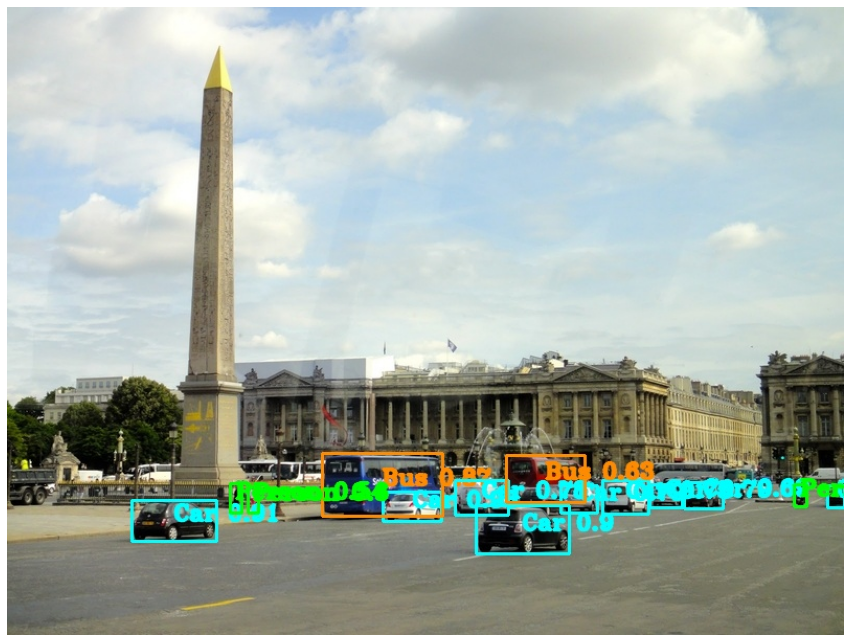

In [30]:
img_result = cv2.imread(OUTFILE)
plt.figure(figsize=(15, 15)) 
plt.axis('off')
image_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [31]:
df = yoloresults.pandas().xyxy[0]
df

xmin        ymin        xmax        ymax  confidence  class    name
0   359.680450  463.882202  415.798981  491.965790    0.926845      2     car
1   119.123802  471.171906  200.208344  510.674622    0.912711      2     car
2   448.715149  476.062317  537.051453  522.697693    0.903492      2     car
3   301.567993  426.866699  416.975464  486.964722    0.867520      5     bus
4   614.528198  456.885315  645.954041  478.555969    0.787546      2     car
5   529.846191  457.784424  564.183655  483.156891    0.787380      2     car
6   428.309448  452.656006  479.302948  485.831360    0.777933      2     car
7   569.857056  452.774933  613.001038  484.031494    0.754102      2     car
8   647.672791  454.786560  684.976257  479.700745    0.689283      2     car
9   477.060242  428.966797  552.292480  473.700378    0.627338      5     bus
10  784.033508  457.093811  800.000000  478.116821    0.596548      2     car
11  230.671921  458.479492  240.781708  483.081329    0.595631      0  person
12  752.907715  456.683716  764.472168  477.742462    0.553954      0  person
13  213.791260  455.951813  224.164185  483.270691    0.540529      0  person

In [32]:
df['name'].value_counts(sort=True)

car       9
person    3
bus       2
Name: name, dtype: int64

<AxesSubplot:>

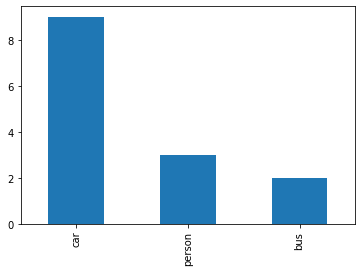

In [33]:
df['name'].value_counts(sort=True).plot.bar()